In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
books = pd.read_csv('books.csv')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [66]:
#1. To list the number of rows and columns in the books dataset
print(f'There are totally:{books.shape[0]} rows and there are totaly:{books.shape[1]} columns')

There are totally:363 rows and there are totaly:24 columns


In [67]:
#2. To list the number of books which do not have an original title
print('The number of books that do not have an original tiles are :',books['original_title'].isnull().sum())

The number of books that do not have an original tiles are : 0


In [68]:
#3. to remove the null values in the original_title column
books = books.dropna(subset = ['original_title'])
print(books['original_title'].isnull().sum())

0


In [69]:
#3 to list the number of unique books in the dataset based on book_id
print("The total number of unique books present in the dataset are :",books['book_id'].nunique())

The total number of unique books present in the dataset are : 363


In [70]:
#4. To find the average rating of all the books present in the dataset based on average_rating columns
avg_rating = books['average_rating'].mean()
print('Average rating =',avg_rating)

Average rating = 3.987079889807162


In [71]:
#5. To find the number of books published in the year 2000
books_2000 = books[books['original_publication_year'] == 2000]
print("The number of books published in the year 2000:",books_2000.shape[0])

The number of books published in the year 2000: 7


In [72]:
#6. T list the book title which has the maximum number of ratings based on work_ratings_count
max_rating_row = books.loc[books['work_ratings_count'].idxmax()]
max_ratings_title = max_rating_row['title']
max_ratings_count = max_rating_row['work_ratings_count']
print(f"The book with the maximum number of rating is '{max_ratings_title}' with '{max_ratings_count}' ratings")

The book with the maximum number of rating is 'The Diary of a Young Girl' with '2024493' ratings


In [73]:
#7. Bucketting
buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bucket_counts = pd.cut(books['average_rating'], bins=buckets, labels=buckets[:-1], include_lowest=True).value_counts().sort_index()
bucket_counts

average_rating
0.0      0
0.5      0
1.0      0
1.5      0
2.0      0
2.5      0
3.0      7
3.5    175
4.0    181
4.5      0
Name: count, dtype: int64

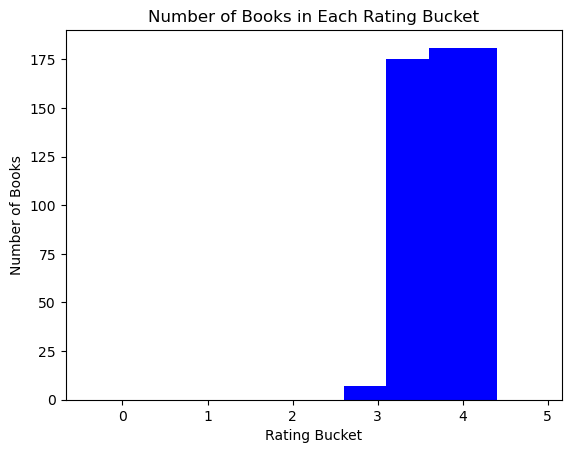

In [64]:
#7. plotting bar graph
plt.bar(bucket_counts.index, bucket_counts.values, color='blue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()